## Graphing Electron Momentum

The following creates three graphs, showing the histograms of the x, y, and z momentum of all the electrons.

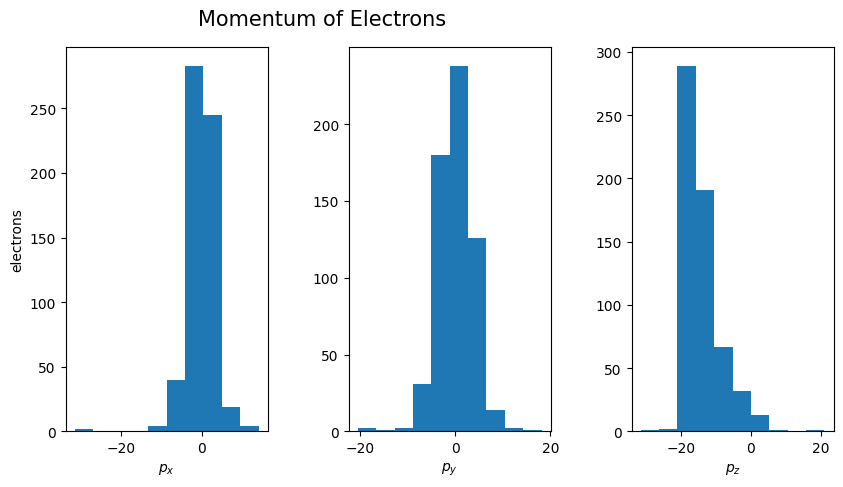

In [2]:
import enum
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt


px, py, pz = [], [], []

# get data from file
file_path = 'C:/Users/eholt/OneDrive/Documents/school/mentorship/EIC_JLAB_analysis/data/pythia8NCDIS_18x275_minQ2=10_beamEffects_xAngle=-0.025_hiDiv_1.0000.eicrecon.tree.edm4eic.root'
events = ur.open(file_path + ':events')
reconstructed_charged_particles = events['ReconstructedChargedParticles'].arrays()

# loop through events to find electrons and store their momentum
for i, event in  enumerate(reconstructed_charged_particles['ReconstructedChargedParticles.PDG']):
    for j, particle in  enumerate(event):
        if particle == 11:
            px.append(reconstructed_charged_particles['ReconstructedChargedParticles.momentum.x'][i][j])
            py.append(reconstructed_charged_particles['ReconstructedChargedParticles.momentum.y'][i][j])
            pz.append(reconstructed_charged_particles['ReconstructedChargedParticles.momentum.z'][i][j])


# graph results
fig, axs = plt.subplots(nrows=1, ncols=3)

axs[0].hist(px)
axs[0].set_xlabel("$p_x$")
axs[0].set_ylabel("electrons")
axs[1].hist(py)
axs[1].set_xlabel("$p_y$")
axs[2].hist(pz)
axs[2].set_xlabel("$p_z$")

fig.suptitle('Momentum of Electrons', fontsize=15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.3, top=0.9, wspace=0.4, hspace=0.4)